# Steps import data
pip intall sklearn

In [61]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 291 kB/s eta 0:00:01


In [1]:

import GetOldTweets3 as got
import pandas as pd
from textblob import TextBlob

In [2]:
df_train=pd.read_excel("tweets.xlsx",index_col=0,header=None)
df_test=pd.read_excel("test.xlsx",index_col=0,header=None)
df_positive_words=pd.read_excel("positive.xlsx",index_col=0,header=None)


In [3]:

df_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,,,,,,,,,,,,,,,,,,,
Tweet Id,Text,NaN,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,NaN,NaN,NaN
1377618168705859585,Model 3 deliveries in Europe https://t.co/fiBN...,NaN,Tesla,Tesla,2021-04-01T13:45:40.000Z,Thu Apr 01 13:45:40 +0000 2021,24152,1625,da,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,NaN,0,0,photo,https://pbs.twimg.com/media/Ex5IasZXMA4cVD8.jpg,https://pbs.twimg.com/media/Ex5IasiW8AAMVRk.jpg,https://pbs.twimg.com/media/Ex5IasoWUA0jdCg.jpg,https://pbs.twimg.com/media/Ex5IaslWgAc97h_.jpg
1375118425362628613,"6,000+ Superchargers across Europe — at 600 lo...",NaN,Tesla,Tesla,2021-03-25T16:12:35.000Z,Thu Mar 25 16:12:35 +0000 2021,51615,4339,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,NaN,0,3,photo,https://pbs.twimg.com/media/ExVm6fuWUAQUFOh.jpg,https://pbs.twimg.com/media/ExVm6fvW8AIjLDy.jpg,https://pbs.twimg.com/media/ExVm6fwWgAgTDPa.jpg,https://pbs.twimg.com/media/ExVm6frWUAcr1EH.jpg
1374481774714126338,RT @Fogdo : Thank you @Tesla for this helpful ...,NaN,Tesla,Tesla,2021-03-23T22:02:46.000Z,Tue Mar 23 22:02:46 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,NaN,0,1,video,https://video.twimg.com/ext_tw_video/117068847...,NaN,NaN,NaN
1371884988371771399,Backseat views from Model Y\n\n📸 by loghi007 o...,NaN,Tesla,Tesla,2021-03-16T18:04:04.000Z,Tue Mar 16 18:04:04 +0000 2021,44971,4112,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,NaN,0,0,video,https://video.twimg.com/ext_tw_video/137188490...,NaN,NaN,NaN


In [4]:
cols = [0,7,8]
df_train = df_train[df_train.columns[cols]]

#Tweet Id 	Text 	Name 	Screen Name 	UTC 	Created At 	Favorites 	Retweets 	Language 	Client 	Tweet Type 	URLs 	Hashtags 	Mentions 	Media Type 	Media URLs 	NaN 	NaN 	


In [5]:
df_train.head()

,1,8,9
0,,,
Tweet Id,Text,Retweets,Language
1377618168705859585,Model 3 deliveries in Europe https://t.co/fiBN...,1625,da
1375118425362628613,"6,000+ Superchargers across Europe — at 600 lo...",4339,en
1374481774714126338,RT @Fogdo : Thank you @Tesla for this helpful ...,0,en
1371884988371771399,Backseat views from Model Y\n\n📸 by loghi007 o...,4112,en


# clean data

In [6]:
import nltk
import re
import pandas as pd
import numpy as np
import string
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [8]:
df_train = df_train.drop_duplicates()
df_train.drop
df_train.shape
#tweet = df[cols[1]]

(3196, 3)

In [9]:
df_train.head()

,1,8,9
0,,,
Tweet Id,Text,Retweets,Language
1377618168705859585,Model 3 deliveries in Europe https://t.co/fiBN...,1625,da
1375118425362628613,"6,000+ Superchargers across Europe — at 600 lo...",4339,en
1374481774714126338,RT @Fogdo : Thank you @Tesla for this helpful ...,0,en
1371884988371771399,Backseat views from Model Y\n\n📸 by loghi007 o...,4112,en


In [10]:
def clear_punctions(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]', '', text)
    return text
df_train[4] = df_train[1].apply(lambda x: clear_punctions(x))
df_train.head()

,1,8,9,4
0,,,,
Tweet Id,Text,Retweets,Language,Text
1377618168705859585,Model 3 deliveries in Europe https://t.co/fiBN...,1625,da,Model deliveries in Europe httpstcofiBNpapG
1375118425362628613,"6,000+ Superchargers across Europe — at 600 lo...",4339,en,Superchargers across Europe — at locations a...
1374481774714126338,RT @Fogdo : Thank you @Tesla for this helpful ...,0,en,RT Fogdo Thank you Tesla for this helpful and...
1371884988371771399,Backseat views from Model Y\n\n📸 by loghi007 o...,4112,en,Backseat views from Model Y\n\n📸 by loghi on I...


In [11]:
def getPolarity(tweet):
    analysis=TextBlob(tweet)
    return analysis.polarity
df_train[9] = df_train[4].apply(getPolarity)  


In [12]:
df_train.head()

,1,8,9,4
0,,,,
Tweet Id,Text,Retweets,0.00,Text
1377618168705859585,Model 3 deliveries in Europe https://t.co/fiBN...,1625,0.00,Model deliveries in Europe httpstcofiBNpapG
1375118425362628613,"6,000+ Superchargers across Europe — at 600 lo...",4339,0.00,Superchargers across Europe — at locations a...
1374481774714126338,RT @Fogdo : Thank you @Tesla for this helpful ...,0,0.35,RT Fogdo Thank you Tesla for this helpful and...
1371884988371771399,Backseat views from Model Y\n\n📸 by loghi007 o...,4112,0.00,Backseat views from Model Y\n\n📸 by loghi on I...


In [13]:
 def polarity(polarity):
    if polarity < 0:
        return "-1"
    elif polarity == 0:
        return '0'
    else:
        return '1'
#     - for negative ,1 for positive and 0 for neutral

df_train[10] = df_train[9].apply(lambda x:polarity(x))
df_train.head()


,1,8,9,4,10
0,,,,,
Tweet Id,Text,Retweets,0.00,Text,0
1377618168705859585,Model 3 deliveries in Europe https://t.co/fiBN...,1625,0.00,Model deliveries in Europe httpstcofiBNpapG,0
1375118425362628613,"6,000+ Superchargers across Europe — at 600 lo...",4339,0.00,Superchargers across Europe — at locations a...,0
1374481774714126338,RT @Fogdo : Thank you @Tesla for this helpful ...,0,0.35,RT Fogdo Thank you Tesla for this helpful and...,1
1371884988371771399,Backseat views from Model Y\n\n📸 by loghi007 o...,4112,0.00,Backseat views from Model Y\n\n📸 by loghi on I...,0


# split data

In [14]:
df_train.head(3)

,1,8,9,4,10
0,,,,,
Tweet Id,Text,Retweets,0.0,Text,0
1377618168705859585,Model 3 deliveries in Europe https://t.co/fiBN...,1625,0.0,Model deliveries in Europe httpstcofiBNpapG,0
1375118425362628613,"6,000+ Superchargers across Europe — at 600 lo...",4339,0.0,Superchargers across Europe — at locations a...,0


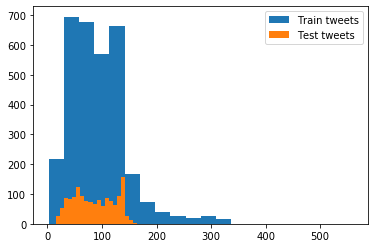

In [15]:
length_train_dataset = df_train[1].str.len()
length_test_dataset = df_test[1].str.len()
plt.hist(length_train_dataset, bins=20,label="Train tweets")
plt.hist(length_test_dataset, bins=20,label="Test tweets")
plt.legend() 
plt.show()


# create a model

In [16]:
import sklearn

In [17]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.model_selection import train_test_split
tweet = df_train[4].values
polarity = df_train[10].values
tweets_train, tweets_test, y_train, y_test = train_test_split(tweet, polarity, test_size=0.2, random_state=1000)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim
bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(df_train[4]) 
# tokenize and build vocabulary
bow.shape

/home/astra/.local/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


(3196, 1000)

In [20]:
df_train=df_train.fillna(0)
#replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df_train[4],
                                                    test_size=0.2, random_state=69)

In [21]:


print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)



X_train_shape :  (2556, 1000)
X_test_shape :  (640, 1000)
y_train_shape :  (2556,)
y_test_shape :  (640,)


NaïveBayes-BernoulliNB


In [33]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

In [36]:

from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
# plt.savefig("confusion_matrix.png")
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f48b85d9dc0> (for post_execute):


KeyboardInterrupt: 

In [35]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.0


In [31]:
# from sklearn.metrics import confusion_matrix

# plt.figure(dpi=600)
# mat = confusion_matrix(y_test, predicted_naive)
# sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

# plt.title('Confusion Matrix for Naive Bayes')
# plt.xlabel('true label')
# plt.ylabel('predicted label')
# plt.savefig("confusion_matrix.png")
# plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.9)



Support VectorMachine

Logistic Regression

# Train model

# Make Predictions

# Evaluate and improve the model